# Practico Mentoria - Introduccion al Aprendizaje Automatico

---

### Importaciones

In [30]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from collections import OrderedDict
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn import preprocessing

from ml.visualization import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [31]:
sns.set_style("whitegrid")
sns.set_context('talk')

In [32]:
# Seteamos una semilla para Reproducibilidad
np.random.seed(1)

---

### Carga de los Datesets

In [46]:
#player_df = pd.read_csv('./Datesets/football_player.csv')
#team_df = pd.read_csv('./Datesets/football_team.csv')
#match_df = pd.read_csv('./Datesets/football_match.csv')

player_df = pd.read_csv('football_player.csv')
team_df = pd.read_csv('football_team.csv')
match_df = pd.read_csv('football_match.csv')


print("Shape 'player_df' = {}".format(player_df.shape))
print("Shape 'team_df'   = {}".format(team_df.shape))
print("Shape 'match_df'  = {}".format(match_df.shape))

Shape 'player_df' = (9925, 44)
Shape 'team_df'   = (288, 22)
Shape 'match_df'  = (25979, 15)


---

## **Regresion**

Vamos a predecir el `overall_rating` de un jugador

In [61]:
# Separamos el "target" del resto del dataset

X = player_df.loc[:, player_df.columns != 'overall_rating']
y = player_df['overall_rating']



print(player_df['overall_rating'])

0       63.60
1       66.97
2       67.00
3       69.09
4       73.24
5       77.26
6       60.57
7       79.77
8       48.00
9       67.05
10      71.62
11      66.29
12      62.25
13      66.93
14      78.50
15      54.62
16      62.61
17      61.77
18      69.38
19      71.86
20      68.29
21      68.69
22      59.00
23      63.00
24      54.33
25      63.31
26      63.10
27      67.48
28      63.29
29      62.77
        ...  
9895    78.95
9896    70.50
9897    75.00
9898    69.20
9899    69.00
9900    70.43
9901    66.28
9902    62.61
9903    62.30
9904    63.75
9905    63.44
9906    62.73
9907    64.18
9908    60.40
9909    88.29
9910    70.35
9911    64.54
9912    75.46
9913    66.00
9914    74.42
9915    69.44
9916    67.00
9917    59.55
9918    64.40
9919    77.04
9920    64.00
9921    65.76
9922    74.38
9923    65.69
9924    80.00
Name: overall_rating, Length: 9925, dtype: float64


In [62]:
player_df.dtypes

player_name             object
birthday                object
age                      int64
height_m               float64
weight_kg              float64
imc                    float64
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
intercep

Seleccionamos un feature de los listados en la descripción que no sea categórico, por ejemplo `vision`

In [63]:
# TODO: modificar esta feature por algún otro (o una combinacion de estos) para ver como cambian los resultados
X = X[[
    'vision',
]]

#selected_feature = 'vision'  # TODO: modificar esto por algún otro valor para ver como cambian los resultados
#feature_col = feature_map[selected_feature]
#X_train_feature = X_train[:, feature_col].reshape(-1, 1)  # Hay que ser que sea una matriz no un vector para que funcione con scikit learn
#X_val_feature = X_val[:, feature_col].reshape(-1, 1)

### División de datos en conjuntos de entrenamiento y evaluación

La primer tarea consiste en dividir el conjunto de datos cargados en el apartado anterior en conjuntos de entrenamiento (o _training_) y evaluación (o _test_).

Utilizar aproximadamente 70% de los datos para entrenamiento y 30% para validación.

Links:
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [64]:
# TODO

# División entre instancias y etiquetas player_df
#X, y = player_df.iloc[:, 1:], player_df.vision,

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [65]:
player_df.describe()

,age,height_m,weight_kg,imc,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,...,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000,9925.000000
mean,28.207456,1.818287,76.385616,23.057561,66.975151,72.173777,52.996832,47.979831,55.976707,60.534232,...,55.727210,53.281248,46.027170,49.331601,47.144808,15.036735,16.140819,20.536419,16.214751,16.541986
std,5.106009,0.063596,6.840999,1.328325,6.152181,5.720549,16.265914,18.169574,15.673000,13.522221,...,14.101618,13.870026,20.048151,20.399647,20.589864,16.863321,15.543618,15.684095,15.763086,16.911612
min,17.000000,1.570000,53.070000,17.870000,47.000000,51.000000,6.000000,5.000000,8.000000,10.570000,...,8.000000,9.430000,5.000000,6.000000,6.000000,1.940000,3.260000,3.260000,3.260000,3.260000
25%,24.000000,1.780000,72.120000,22.160000,63.000000,68.130000,43.530000,32.500000,49.000000,56.000000,...,47.130000,44.320000,25.000000,28.750000,25.320000,7.870000,9.240000,10.710000,9.220000,9.160000
50%,28.000000,1.830000,76.200000,23.060000,66.870000,72.140000,56.680000,50.140000,58.600000,63.160000,...,57.570000,54.550000,49.670000,55.110000,52.080000,10.250000,12.040000,15.080000,12.060000,12.000000
75%,32.000000,1.850000,81.190000,23.870000,71.000000,76.000000,65.000000,63.240000,66.640000,69.170000,...,66.000000,63.520000,64.000000,67.000000,65.200000,13.000000,14.690000,23.550000,14.730000,14.730000
max,47.000000,2.080000,110.220000,30.870000,92.190000,95.230000,89.360000,92.230000,93.110000,95.180000,...,95.680000,89.570000,89.670000,90.200000,94.370000,89.860000,82.900000,87.130000,90.160000,90.950000


In [66]:
player_df.head(10)

,player_name,birthday,age,height_m,weight_kg,imc,overall_rating,potential,preferred_foot,attacking_work_rate,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,Aaron Appindangoye,1992-02-29,24,1.83,84.82,25.36,63.60,67.60,right,medium,...,53.60,47.60,63.80,66.00,67.80,5.60,10.60,9.60,7.60,7.60
1,Aaron Cresswell,1989-12-15,26,1.70,66.22,22.87,66.97,74.48,left,medium,...,57.45,53.12,69.39,68.79,71.52,12.18,8.67,14.24,10.36,12.91
2,Aaron Doran,1991-05-13,25,1.70,73.94,25.53,67.00,74.19,right,medium,...,69.38,60.54,22.04,21.12,21.35,14.04,11.81,17.73,10.12,13.50
3,Aaron Galindo,1982-05-08,34,1.83,89.81,26.85,69.09,70.78,right,medium,...,53.78,41.74,70.61,70.65,68.04,14.17,11.17,22.87,11.17,10.17
4,Aaron Hughes,1979-11-08,36,1.83,69.85,20.89,73.24,74.68,right,medium,...,46.48,52.96,77.60,76.04,74.60,8.28,8.32,24.92,12.84,11.92
5,Aaron Hunt,1986-09-04,29,1.83,73.03,21.84,77.26,80.15,left,medium,...,79.96,75.59,31.70,31.52,32.33,13.22,12.41,15.07,15.56,14.85
6,Aaron Kuhl,1996-01-30,20,1.73,66.22,22.20,60.57,76.00,right,medium,...,60.00,41.57,51.57,57.14,56.57,7.57,12.57,13.57,13.57,14.57
7,Aaron Lennon,1987-04-16,29,1.65,63.05,23.13,79.77,82.00,right,high,...,78.46,63.46,23.23,26.15,20.88,12.85,9.81,17.88,16.92,13.12
8,Aaron Lennox,1993-02-19,23,1.90,82.10,22.62,48.00,56.86,right,medium,...,15.00,41.00,15.00,15.00,12.00,53.00,41.00,39.00,51.00,53.00
9,Aaron Meijers,1987-10-28,28,1.75,77.11,25.10,67.05,69.42,left,medium,...,64.79,54.42,62.58,64.58,61.74,6.21,14.21,6.21,9.21,14.21


> ### Regresion Lineal

Link:
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [67]:
#from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Evaluamos el desempeño del clasificador utilizando la media del error cuadrado (MSE o Mean Squared Error) sobre el conjunto de datos de entrenamiento (`X_train`, `y_train`) y lo comparamos con el de validación (`X_val`, `y_test`).  
Mientras más cercano a cero mejor

In [68]:
model = LinearRegression(n_jobs=-1)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [69]:
print('Media del error cuadrado para entrenamiento: %.2f' % 
      mean_squared_error(y_train, model.predict(X_train)))
print('Media del error cuadrado para validación: %.2f' %
      mean_squared_error(y_test, model.predict(X_test)))

Media del error cuadrado para entrenamiento: 29.18
Media del error cuadrado para validación: 28.57


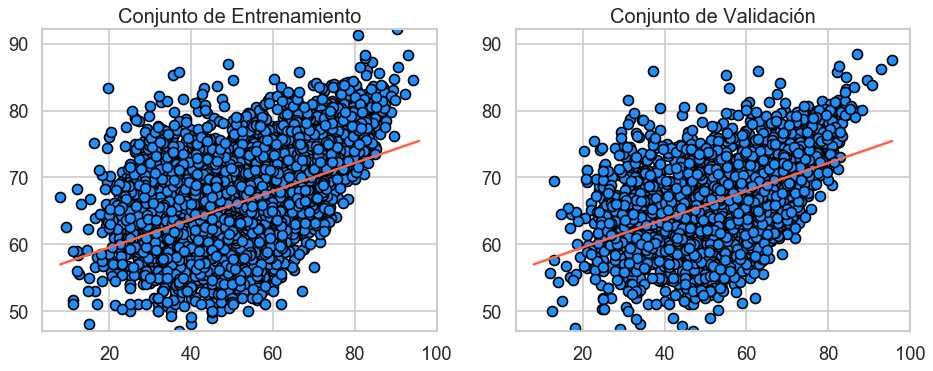

In [70]:
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train, X_test])
X_range_stop = np.max(np.r_[X_train, X_test])
y_range_start = np.min(np.r_[y_train, y_test])
y_range_stop = np.max(np.r_[y_train, y_test])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

#### **Visualizacion**

**Warning**: Tener en cuenta que si son dos o mas features no se va a poder visualizar

In [ ]:
plt.figure(figsize=(14, 5), dpi= 80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train, X_test])
X_range_stop = np.max(np.r_[X_train, X_test])
y_range_start = np.min(np.r_[y_train, y_test])
y_range_stop = np.max(np.r_[y_train, y_test])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

> ### Regresión Polinomial

Link:
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [78]:
polynomial_degree = 20# TODO: Probar distintos grados del polinomio

poly_features = PolynomialFeatures(polynomial_degree)
poly_features.fit(X_train)
X_poly_train = poly_features.transform(X_train)
X_poly_test = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

print(
    "Media del error cuadrado para entrenamiento: {:.2f}"
    .format(mean_squared_error(y_train, model.predict(X_poly_train)))
)
print(
    "Media del error cuadrado para validación: {:.2f}"
    .format(mean_squared_error(y_test, model.predict(X_poly_test)))
)


Media del error cuadrado para entrenamiento: 25.76
Media del error cuadrado para validación: 26.16


#### **Visualizacion**

**Warning**: Tener en cuenta que si son mas de dos features no se va a poder visualizar

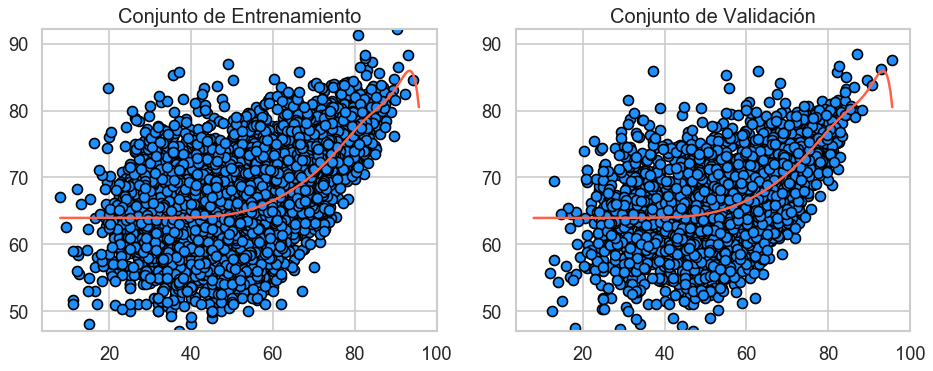

In [79]:
plt.figure(figsize=(14, 5), dpi=80, facecolor='w', edgecolor='k')

X_range_start = np.min(np.r_[X_train, X_test])
X_range_stop = np.max(np.r_[X_train, X_test])
y_range_start = np.min(np.r_[y_train, y_test])
y_range_stop = np.max(np.r_[y_train, y_test])
X_linspace = np.linspace(X_range_start, X_range_stop, 200).reshape(-1, 1)
X_linspace_poly = poly_features.transform(X_linspace)

# Conjunto de entrenamiento
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Entrenamiento")

# Conjunto de validación
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X_linspace, model.predict(X_linspace_poly), color="tomato", label="modelo")
plt.ylim(y_range_start, y_range_stop)
plt.title("Conjunto de Validación")

plt.show()

---

## **Clasificacion Multiclase**

Vamos a predecir el `attacking_work_rate` de un jugador

In [105]:
# Separamos el "target" del resto del dataset

X = player_df.loc[:, player_df.columns != 'attacking_work_rate']
y = player_df['attacking_work_rate']

y.head(10)

0    medium
1    medium
2    medium
3    medium
4    medium
5    medium
6    medium
7      high
8    medium
9    medium
Name: attacking_work_rate, dtype: object

<h3>Codificar la variable categorica `attacking_work_rate` como una variable numerica</h3>

In [107]:
le = preprocessing.LabelEncoder()
y[:] = le.fit_transform(y)
y.head(10)

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    0
8    2
9    2
Name: attacking_work_rate, dtype: int64

In [108]:
player_df.dtypes

player_name             object
birthday                object
age                      int64
height_m               float64
weight_kg              float64
imc                    float64
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate      int64
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
intercep

Seleccionamos un feature de los listados en la descripción que no sea categórico, por ejemplo `vision`

In [109]:
# TODO: modificar esta feature por algún otro (o una combinacion de estos) para ver como cambian los resultados
X = X[[
    'penalties',
]]

### División de datos en conjuntos de entrenamiento y evaluación

La primer tarea consiste en dividir el conjunto de datos cargados en el apartado anterior en conjuntos de entrenamiento (o _training_) y evaluación (o _test_).

Utilizar aproximadamente 70% de los datos para entrenamiento y 30% para validación.

In [100]:
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

> ### Regresion Logistica

In [111]:
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, balanced_accuracy_score
penalty ='l1' # TODO: Tipo de regularización: l1 (valor absoluto), l2 (cuadrados).
alpha =1 # TODO: Parámetro de regularización. También denominado como parámetro `lambda`. Debe ser mayor que 0.

model = LogisticRegression(penalty=penalty, C=1./alpha, multi_class='ovr')
model.fit(X_train, y_train)

print("Accuracy para entrenamiento: {:.2f}".format(balanced_accuracy_score(y_train, model.predict(X_train))))
print("Accuracy para validación   : {:.2f}".format(balanced_accuracy_score(y_test, model.predict(X_test))))

Accuracy para entrenamiento: 0.33
Accuracy para validación   : 0.33


#### **Matriz de Confusion**

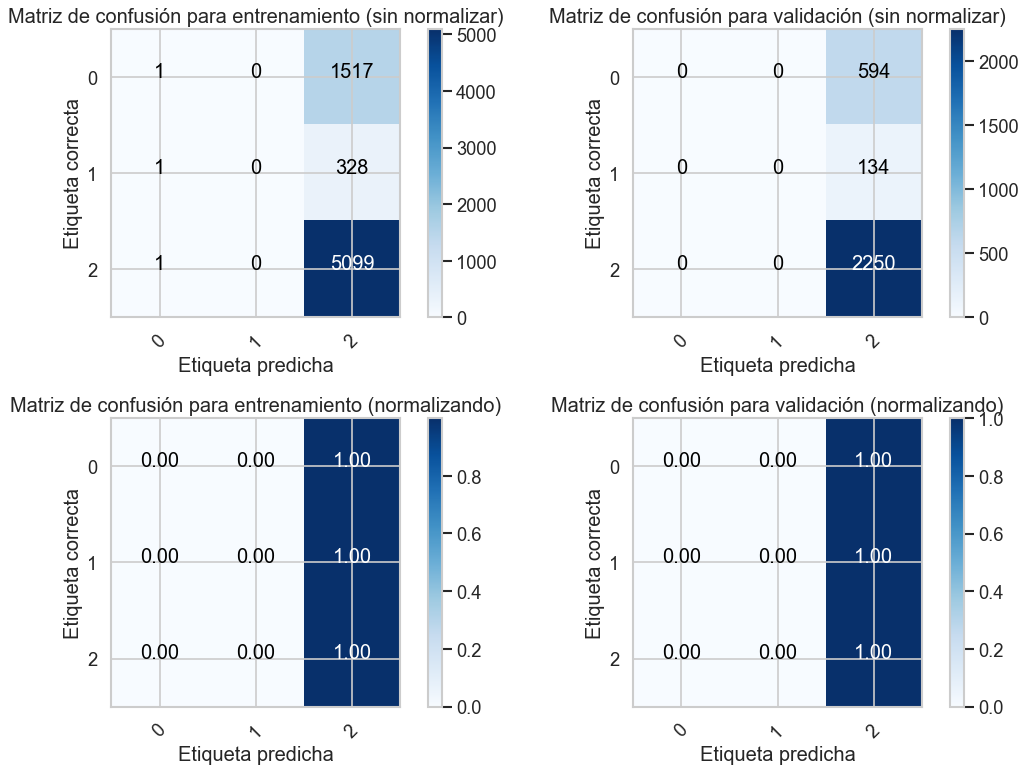

In [112]:
plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.subplot(2, 2, 1)
plot_confusion_matrix(
    confusion_matrix(y_train, model.predict(X_train)),
    classes=np.unique(y),
    title='Matriz de confusión para entrenamiento (sin normalizar)'
)

plt.subplot(2, 2, 3)
plot_confusion_matrix(
    confusion_matrix(y_train, model.predict(X_train)),
    classes=np.unique(y),
    normalize=True,
    title='Matriz de confusión para entrenamiento (normalizando)'
)

plt.subplot(2, 2, 2)
plot_confusion_matrix(
    confusion_matrix(y_test, model.predict(X_test)),
    classes=np.unique(y),
    title='Matriz de confusión para validación (sin normalizar)'
)

plt.subplot(2, 2, 4)
plot_confusion_matrix(
    confusion_matrix(y_test, model.predict(X_test)),
    classes=np.unique(y),
    normalize=True,
    title='Matriz de confusión para validación (normalizando)'
)

plt.show()

<h3>Visualización de la frontera de decisión</h3>

#### Seleccion de Hiperparametros

Utilizando búsqueda exhaustiva (*grid search*) con *n-fold cross-validation* (por ejemeplo *5-fold*) y utilizando como métrica la **Accuracy**, hagan una selección de los mejores hiperparámetros para su conjunto de datos y el modelo que hayan elegido en el apartado anterior.

Links:
* https://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.GridSearchCV.html

In [119]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
Reporte de clasificación para el mejor clasificador (sobre Conjunto de Entrenamiento):

              precision    recall  f1-score   support

        high       0.00      0.00      0.00      1518
         low       0.04      0.74      0.08       329
      medium       0.85      0.24      0.38      5100

   micro avg       0.21      0.21      0.21      6947
   macro avg       0.30      0.33      0.15      6947
weighted avg       0.63      0.21      0.28      6947


Reporte de clasificación para el mejor clasificador (sobre Conjunto de Evaluación):

              precision    recall  f1-score   support

        high       0.00      0.00      0.00       594
         low       0.04      0.73      0.08       134
      medium       0.88      0.26      0.40      2250

   micro avg       0.23      0.23      0.23      2978
   macro avg       0.31      0.33      0.16      2978
weighted avg       0.66      0.23      0.31 

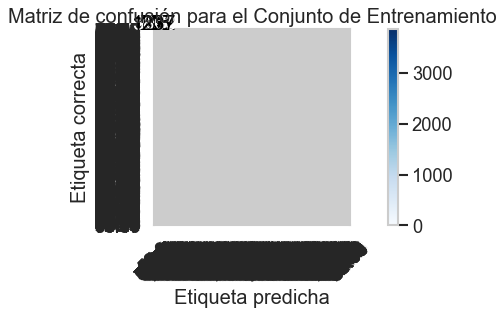

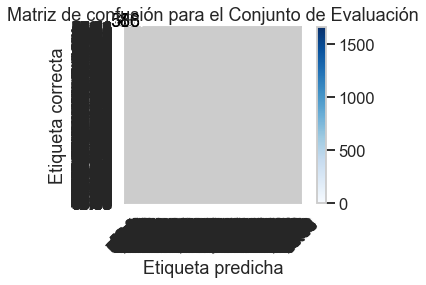

In [121]:
np.random.seed(123)

plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')

model = SGDClassifier()
model.fit(X_train, y_train)

# Clasificación para Conjunto Entrenamiento. 
print("= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = ")
print("Reporte de clasificación para el mejor clasificador (sobre Conjunto de Entrenamiento):", end="\n\n")
print(classification_report(y_train, model.predict(X_train)), end="\n\n")


# Clasificación para Conjunto Evaluación. 
print("Reporte de clasificación para el mejor clasificador (sobre Conjunto de Evaluación):", end="\n\n")
y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_test, model.predict(X_test)), end="\n\n")
# para ambos casos utilizamos como hiperparametros los valores predeterminados del SGD class.

print("= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = ", end="\n\n")

## Matriz de confusión para Conjunto de Entrenamiento

cm_train = confusion_matrix(y_train, model.predict(X_train))
classes=player_df.agility.unique()

plot_confusion_matrix(cm_train,classes,normalize=False,
                      title="Matriz de confusión para el Conjunto de Entrenamiento",cmap=plt.cm.Blues)

plt.show()

## Matriz de confusión para Conjunto de Evaluación
cm_pred=confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm_pred,classes, normalize=False,
                      title="Matriz de confusión para el Conjunto de Evaluación",cmap=plt.cm.Blues)
    
plt.show()

# Función "hinge"

Mejor conjunto de parámetros:
{'C': 10.0, 'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'saga', 'tol': 0.001}

Puntajes de la GridSearchCV:

Exactitud: 0.734 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'saga', 'tol': 0.001}
Exactitud: 0.734 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'saga', 'tol': 0.0001}
Exactitud: 0.734 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'saga', 'tol': 1e-05}
Exactitud: 0.000 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'lbfgs', 'tol': 0.001}
Exactitud: 0.000 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'lbfgs', 'tol': 0.0001}
Exactitud: 0.000 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'lbfgs', 'tol': 1e-05}
Exactitud: 0.734 (+/-0.000) para los parámet

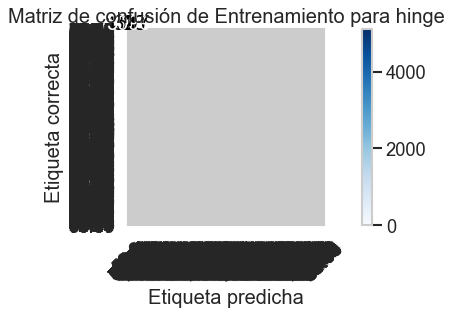

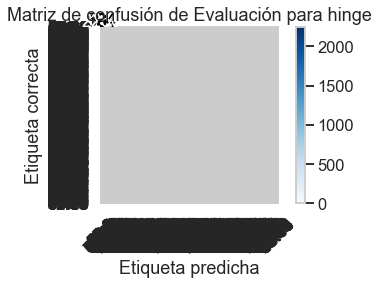

# Función "log"

Mejor conjunto de parámetros:
{'C': 10.0, 'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'saga', 'tol': 0.001}

Puntajes de la GridSearchCV:

Exactitud: 0.734 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'saga', 'tol': 0.001}
Exactitud: 0.734 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'saga', 'tol': 0.0001}
Exactitud: 0.734 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'saga', 'tol': 1e-05}
Exactitud: 0.000 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'lbfgs', 'tol': 0.001}
Exactitud: 0.000 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'lbfgs', 'tol': 0.0001}
Exactitud: 0.000 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'lbfgs', 'tol': 1e-05}
Exactitud: 0.734 (+/-0.000) para los parámetro

              precision    recall  f1-score   support

        high       0.00      0.00      0.00       594
         low       0.00      0.00      0.00       134
      medium       0.76      1.00      0.86      2250

   micro avg       0.76      0.76      0.76      2978
   macro avg       0.25      0.33      0.29      2978
weighted avg       0.57      0.76      0.65      2978


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 



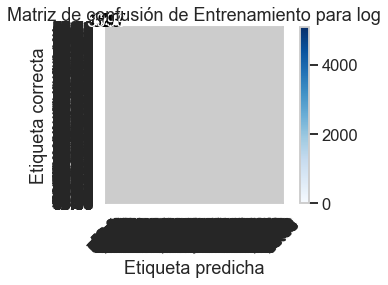

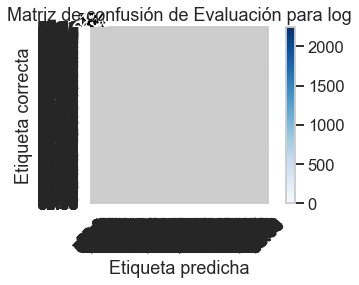

# Función "perceptron"

Mejor conjunto de parámetros:
{'C': 10.0, 'max_iter': 100, 'multi_class': 'multinomial', 'solver': 'saga', 'tol': 0.001}

Puntajes de la GridSearchCV:

Exactitud: 0.734 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'saga', 'tol': 0.001}
Exactitud: 0.734 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'saga', 'tol': 0.0001}
Exactitud: 0.734 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'saga', 'tol': 1e-05}
Exactitud: 0.000 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'lbfgs', 'tol': 0.001}
Exactitud: 0.000 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'lbfgs', 'tol': 0.0001}
Exactitud: 0.000 (+/-0.000) para los parámetros {'C': 10.0, 'max_iter': 10, 'multi_class': 'ovr', 'solver': 'lbfgs', 'tol': 1e-05}
Exactitud: 0.734 (+/-0.000) para los pa

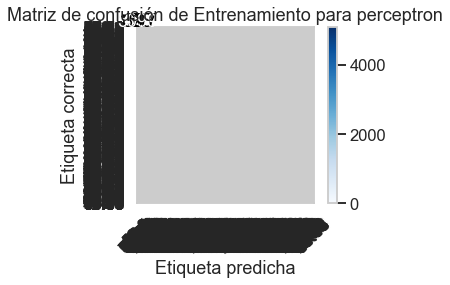

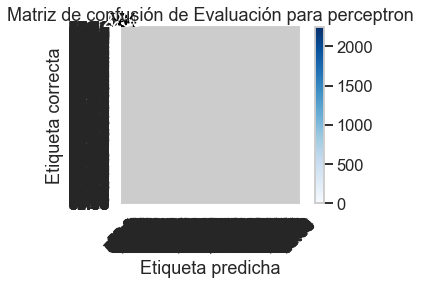

In [129]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
np.random.seed(123)


plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')

for idx, loss in enumerate(('hinge', 'log', 'perceptron'), start=1):
    parametros = {
        'C': (1e+1, 1, 1e-1),
        'multi_class': ('ovr', 'multinomial'),
        'tol': (1e-3, 1e-4, 1e-5),
        'max_iter': (10, 100, 1000),
        'solver': ('saga', 'lbfgs')}  
    
    clasif = LogisticRegression(n_jobs=1, random_state=1, penalty='l1')
    model = GridSearchCV(clasif, parametros, cv=5, scoring='accuracy', iid=False, error_score=0.0, n_jobs=-1)  
    model.fit(X_train, y_train)

    print("# Función \"%s\"" % loss, end="\n\n")

    print("Mejor conjunto de parámetros:")
    print(model.best_params_, end="\n\n")
    # Model Accuracy, how often is the classifier correct?
    
 

    print("Puntajes de la GridSearchCV:", end="\n\n")
    means = model.cv_results_['mean_test_score']
    stds = model.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model.cv_results_['params']):
        print("Exactitud: %0.3f (+/-%0.03f) para los parámetros %r" % (mean, std ** 2, params))
    print()
## Reporte clasificación para Conjunto Entrenamiento
    print("Clasificación sobre Conjunto de Entrenamiento:", end="\n\n")
    print(classification_report(y_train, model.predict(X_train)), end="\n\n")

    print("= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = ", end="\n\n")
    
    
## Reporte clasificación para Conjunto Evaluación
    print("Clasificación sobre Conjunto de Evaluación):", end="\n\n")
    y_true, y_pred = y_test, model.predict(X_test)
    print(classification_report(y_test, model.predict(X_test)), end="\n\n")
    

    print("= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = ", end="\n\n")

    
## Matriz de Confusión para el Conjunto de Entrenamiento
    classes=player_df.agility.unique()
    p=plot_confusion_matrix(confusion_matrix(y_train, model.predict(X_train)),
                          classes, title="Matriz de confusión de Entrenamiento para %s" % loss)
    plt.show()
    
## Matriz de Confusión para el Conjunto de Evaluación 
  
    p2=plot_confusion_matrix(confusion_matrix(y_true, y_pred),
                          classes, title="Matriz de confusión de Evaluación para %s" % loss)
    plt.show()

---

**Comunicación de Resultados**

Se pide que toda esta información no quede plasmada solamente en un Jupyter Notebook, sino que se diagrame una comunicación en formato textual o interactivo (Google Docs, PDF o Markdown por ejemplo).

La comunicación debe estar apuntada a un público técnico pero sin conocimiento del tema particular, como por ejemplo, sus compañeros de clase.